In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as si
import numpy.linalg as npla



import pandas as pd
from scipy.sparse.csc import csc_matrix

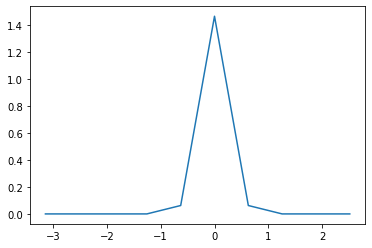

-1.6941026134411961e-18


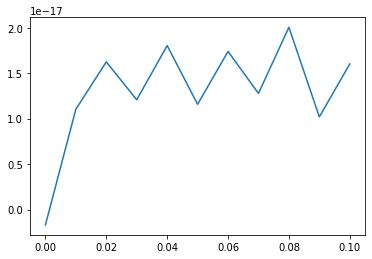

[ 0.00000000e+00+0.j -2.16399237e-19+0.j -7.42400183e-19+0.j
 -1.03826284e-18+0.j -1.46684910e-18+0.j -4.00757219e-19+0.j
 -2.25458126e-18+0.j -1.22561325e-18+0.j -1.56812930e-18+0.j
 -7.13786145e-19+0.j -9.67708259e-19+0.j]


/home/sophie/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


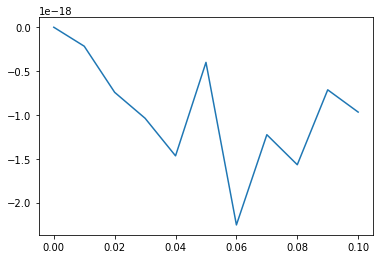

[-8.58013999e-10-1.01662825e-09j -1.50134156e-07+5.57912992e-08j
 -4.72334969e-06+2.75078303e-05j  1.93192772e-03+2.64358330e-03j
  2.33835524e-01+8.45039931e-02j  1.07383366e+00+5.61026388e-01j
  2.33835524e-01+8.45039931e-02j  1.93192772e-03+2.64358330e-03j
 -4.72334969e-06+2.75078303e-05j -1.50134156e-07+5.57912992e-08j]


In [2]:
#Wigner/Husini function implementation
#Particle on ring Dimensionless


#variables
Omeg0=1.0
Omeg1=1.0
eps=0.0
ntild=10#ntild = 1 is quantum, ntild>>1 is classical
dt=0.01
nsteps=10
isteps=10

t0=0
theta0=0#+0.1
thetamin=-np.pi
thetamax=np.pi
k=1j

#dependent variables
dtheta=(2*thetamax)/isteps
sigma=0.5

#initial arrays 
theta=np.zeros(isteps)
drv=np.zeros(nsteps+1)
t=np.zeros(nsteps+1)
   
for n in range(nsteps+1):#t,drv array, drv is drive force
    tn=t0+(n)*dt
    t[n]=tn
    drvn=np.cos(Omeg1*tn)
    drv[n]=drvn

T=np.zeros(isteps,np.complex)#wave packet array

for i in range(0,isteps):#theta,initial wave packet array T
    thetai=thetamin+(i)*dtheta
    theta[i]=thetai
    Ti=np.exp((-0.0*k*thetai)+(-1)*((thetai-theta0)**2)/(sigma)**2)
    T[i]=Ti
    
#probibility here, to normalize
Total=np.sum(np.abs(T)**2)*dtheta
T=T/(np.sqrt(Total))
#make array of arrays of T
Tn=[]
Tn.append(T)

#definitions of coeffients
def a(drv,theta):
    a1=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return a1
def b(drv,theta):
    b1=((k/(Omeg0*dt))+(1/(ntild*2*(dtheta)**2))+((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n])**2/4)-(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b1 
def c(drv,theta):
    c1=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return c1

def a_1(drv,theta):
    a_11=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return a_11
def b_1(drv,theta):
    b_11=((k/(Omeg0*dt))-(1/(ntild*2*(dtheta)**2))-((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n+1])**2/4)+(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b_11
def c_1(drv,theta):
    c_11=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return c_11

def CrankNicolson(T,n):#Crank nicolson solver with periodic boundary conditions
    RHS=np.zeros(isteps,np.complex)#RHS
    for i in range(-1,isteps-1):
        temp1=-a(drv,theta[i])
        temp2=b(drv,theta[i])
        temp3=-c(drv,theta[i])
        RHS[i]=temp1*T[i+1]+temp2*T[i]+temp3*T[i-1]
    D=np.matrix(RHS).T#made matrix for the RHS
    d=np.zeros((isteps,isteps),np.complex)#LHS
    for i in range(-1,isteps-1):
        d[i,i]=b_1(drv,theta[i])
        d[i,i+1]=a_1(drv,theta[i])
        d[i,i-1]=c_1(drv,theta[i])
    d=np.matrix(d)#made matrix for LHS
    I=npla.inv(d)#matrix inversion using linear algebra 
    T1=I*D
    T1=np.array(T1.T)[0]#add to array of T
    return T1

#plt.plot(theta,np.real(T))# plots initial condition
#Run for all t
for n in range(nsteps):#Plots real parts                                                                  
    T=CrankNicolson(T,n)
    Tn.append(T)
 #   plt.plot(theta,np.real(T))
    
#plt.show() 

#for T in Tn:#Plots imaginary parts
  #  plt.plot(theta,np.imag(T))

#plt.show()

#for T in Tn:#plots overall average
   # plt.plot(theta,np.abs(T)**2)
   #print(np.sum(np.abs(T)**2)*dtheta)#checking for unitarity

for n in range(0,nsteps,10):
    plt.plot(theta,np.abs(Tn[n])**2)

plt.show()

#Expecatation values

def position(theta,T):#calculates expectation value
    TA=0.
    for i in range(isteps):
        TA=TA+theta[i]*(np.abs(T[i])**2)*dtheta
    return TA

xbar=np.zeros(nsteps+1)
for n in range(nsteps+1):
    xbar[n]=np.real(position(theta,Tn[n]))
    
print(xbar[0])
plt.plot(t,xbar)
plt.show()

#angular momentum value, this works as long as Omeg0=1, which it does
Exp_momentum=np.zeros((nsteps+1,2),np.complex)
def momentum(T):#calculates expectation value
    P=0.
    for i in range(-1,isteps-1):
        P=P+(1)*(-k)*(Omeg0/ntild)*np.conj(T[i])*((T[i+1]-T[i-1])/(2*dtheta))*dtheta
    return(P)

pbar=np.zeros((nsteps+1),np.complex)
#
for n in range(nsteps+1):
    pbar[n]=np.real(momentum(Tn[n]))
    Exp_momentum[n,0]=t[n]#time
    Exp_momentum[n,1]=momentum(Tn[n])#expectation value of momentum

Exp_momentum=np.matrix(Exp_momentum)#table showing time and expectation value
print(pbar)
plt.plot(t,pbar)
plt.show()

print(T)

(10, 10, 10)
[ 2.25458126e-18+0.j  1.75356320e-18+0.j  1.25254515e-18+0.j
  7.51527087e-19+0.j  2.50509029e-19+0.j -2.50509029e-19+0.j
 -7.51527087e-19+0.j -1.25254515e-18+0.j -1.75356320e-18+0.j
 -2.25458126e-18+0.j]
[-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
(10,)
(10,)
[[ 6.28318531  2.24443164  0.0954557   0.84178721  4.13420937  8.43216125
  11.7245834  12.47091491 10.32193897  6.28318531]
 [ 2.24443164 -1.79432202 -3.94329796 -3.19696645  0.0954557   4.39340758
   7.68582974  8.43216125  6.28318531  2.24443164]
 [ 0.0954557  -3.94329796 -6.0922739  -5.34594239 -2.05352024  2.24443164
   5.5368538   6.28318531  4.13420937  0.0954557 ]
 [ 0.84178721 -3.19696645 -5.34594239 -4.59961088 -1.30718872  2.99076315
   6.28318531  7.02951682  4.88054088  0.84178721]
 [ 4.13420937  0.0954557  -2.05352024 -1.30718872  1.98523343  6.28318531
   9.57560746 10.32193897  8.17296303  4.13420937]
 [ 8.43216125  4.39340

/home/sophie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: ComplexWarning: Casting complex values to real discards the imaginary part


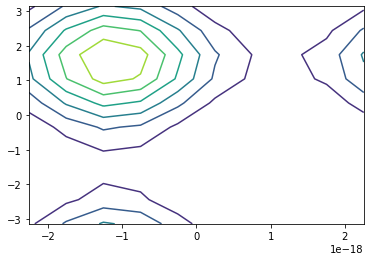

In [14]:
omega=np.linspace(-min(pbar),min(pbar),10)
theta=theta
x=np.linspace(-np.pi,np.pi,10)

#psi=CrankNicolson(T,n)

dx=1

omega1,theta1,x1=np.meshgrid(omega,theta,x)
omega2,theta2=np.meshgrid(omega,theta)
#theta3,x3=np.meshgrid(theta,x)
#print(x1,y1)
#print(x,y)

isteps=len(omega)
jsteps=len(theta)

def Husimi(omega0,theta0,z0):
    return T*np.exp((k*ntild*omega0*x)-(((theta0-x0)**2)/(4*(dx**4))))

func=f(omega1,theta1,x1)

print(func.shape)
print(omega)
print(theta)
#plt.plot(z)
#plt.show()

#plt.contour(x1,y1,z)
#plt.show()


#print(x[0])
#print(z)
print(omega.shape)
print(theta.shape)
#print(z.shape)


Int=np.zeros((isteps,jsteps))
for i in range(isteps):
    for j in range(jsteps):
        Int[i,j]=si.simps(func[i,:,j],x)#,np.pi/2,-1,'avg')
        
print(Int)
print(Int.shape)
print(omega2.shape)

plt.contour(np.real(omega2),np.real(theta2),np.abs(Int)**2)#blue
plt.show()

